In [39]:
import sympy as sp
import numpy as np
from scipy.integrate import quad
from scipy.stats import norm
import matplotlib.pyplot as plt
from sympy.utilities import lambdify
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [40]:
sp.init_printing()

In [41]:
x = sp.Symbol('x', real=True)
k = sp.Symbol('k', real=True, positive=True)
a = sp.Symbol('a', real=True)
m = sp.Symbol('m', real=True, positive=True)
t = sp.Symbol('t', real=True, positive=True)
h = sp.Symbol('hbar', real=True, positive=True)
n = sp.Symbol('n', integer=True, nonzero=True)
psi = sp.Function('psi')

x, k, a, m, t, h, n, psi(x)

$$\frac{d^2\psi(x)}{dx^2} = -k^2\psi(x)$$

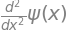

In [42]:
psi(x).diff(x, x)

In [43]:
-k**2 * psi(x)

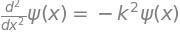

In [44]:
eq = sp.Eq(psi(x).diff(x, x), -k**2 * psi(x))
eq

In [45]:
sp.dsolve(eq, psi(x))

In [46]:
sp.dsolve(eq, psi(x), ics={psi(0): 0, psi(a): 0})

In [47]:
sol = sp.dsolve(eq, psi(x), ics={psi(0): 0})
sol

In [48]:
sol = sol.subs(k, n * sp.pi / a)
sol

In [49]:
sol = sol.subs(sp.Symbol('C1'), sp.sqrt(2 / a))
sol

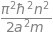

In [50]:
En = n**2 * sp.pi**2 * h**2 / (2 * m * a**2)
En

In [51]:
phi = sp.exp(-sp.I * En * t / h)
phi

In [52]:
Psi = sol.rhs * phi
Psi

In [53]:
Psif = lambdify((x, t, n), Psi.subs({a: 1, m: 1, h: 1}))
Psif

<function _lambdifygenerated(x, t, n)>

In [54]:
Psif(0.3, 2.3, 1)

(0.3971182633717983+1.0729930471683005j)

$$<\omega>=\int \Psi^{*} \hat{\omega} \Psi\ dx$$
W stanie stacjonarnym
$$<\omega>=\int \psi^{*} \hat{\omega} \psi\ dx$$

$$\hat{x}=x$$

In [55]:
sol.rhs * x * sol.rhs

$$\sigma_X^2=<x^2>-<x>^2$$

$$<p>=?$$
$$<p^2>=?$$
$$\sigma_P^2=?$$

$$\sigma_X \sigma_P \geq \frac{\hbar}{2}$$

Spradzić, czy ta zasada nieoznaczoności jest faktycznie dla tej studni potencjału spełniona.

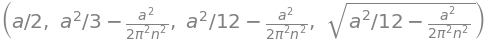

In [60]:
X = sp.integrate(sol.rhs * x * sol.rhs, (x, 0, a)).simplify()
square_of_X = sp.integrate(sol.rhs * x**2 * sol.rhs, (x, 0, a)).simplify()
square_of_sigma_X = square_of_X-X**2
sigma_X=sp.sqrt(square_of_sigma_X)
X, square_of_X, square_of_sigma_X, sigma_X

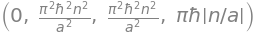

In [61]:
P=sp.integrate(sol.rhs*-h*sp.I*sol.rhs.diff(x),(x,0,a)).simplify()
square_of_P=sp.integrate(sol.rhs * (sol.rhs).diff(x,x)*-h**2, (x, 0, a)).simplify()
square_of_sigma_P=square_of_P-P**2
sigma_P=sp.sqrt(square_of_sigma_P).simplify()
P,square_of_P,square_of_sigma_P,sigma_P

Sprawdzam nierówność:
$$\sigma_X \sigma_P \geq \frac{\hbar}{2}$$

In [62]:
check=sigma_P*sigma_X
check.simplify()

Gdy n jest najmniejsze, czyli n = 1:

In [65]:
left = h*sp.sqrt(3*sp.pi**2-18)/6
right = h/2

left.evalf(), right

Dla najmniejszej wartości n zasada nieoznaczoności jest spełniona, zatem jest także spełniona dla innych n.